## Figura para o livro ##


In [1]:
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
#plt.switch_backend('agg')
from scipy import signal
#from PIL import Image
#import pandas as pd
#import nolds
#import seaborn as sns

In [50]:
from scipy.signal import butter, lfilter

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

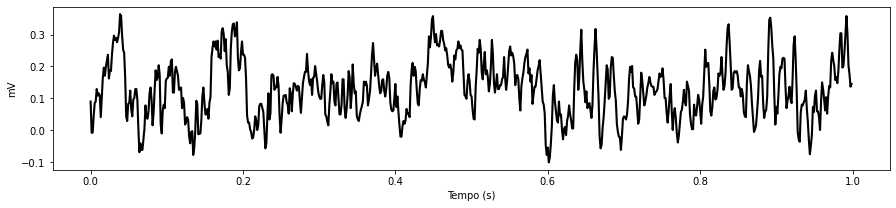

In [76]:
data=np.genfromtxt('I_D_1_5minI.csv',delimiter=',')#np.genfromtxt(path+'/'+'CD1Mm.CSV',delimiter=',')
fig = plt.figure(figsize=(15,3))
Fs=750
t=np.arange(0,1,1/Fs)

a=Fs*10
#plt.plot(t,data[0:Fs],'k',linewidth=1.5)
plt.plot(t,data[a:a+Fs],'k',linewidth=2.1)

plt.xlabel('Tempo (s)')
plt.ylabel('mV')
plt.savefig('rawdata.svg')


In [85]:
import scipy.io
wdata = scipy.io.loadmat('welch_data.mat')
f=wdata['f']
p=wdata['p']

array([[3.33333333e-02],
       [6.66666667e-02],
       [1.00000000e-01],
       ...,
       [2.99933333e+02],
       [2.99966667e+02],
       [3.00000000e+02]])

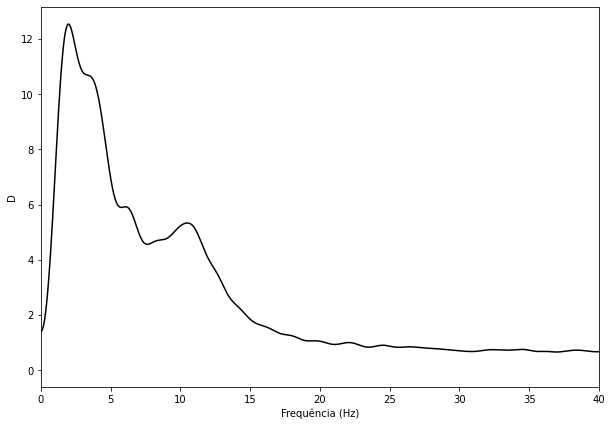

In [89]:
#f, Pxx_den = signal.welch(data[0:Fs*10], Fs)
fig = plt.figure(figsize=(10,7))

plt.plot(f,p,'k',linewidth=1.5)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Power(mv)')
plt.savefig('welch.svg')
plt.xlim(0,40)
fig.savefig('powerspectrum.svg', dpi=100)


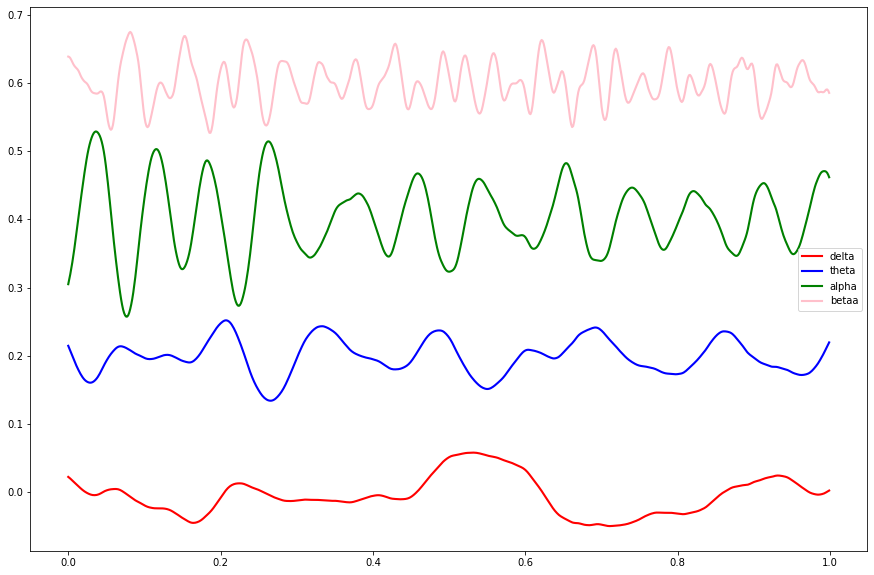

In [79]:
fig = plt.figure(figsize=(15,10))

lowcut=[0.5,4,8,16]
highcut=[4,8,16,32]
waves=['delta','theta','alpha','betaa']
Cwaves=['red','blue','green','pink']
fs=750
#i=1

count = 0
a=Fs*10
for i in range(len(lowcut)):
    y = butter_bandpass_filter(data, lowcut=lowcut[i], highcut=highcut[i], fs=750,order=2)
           
    plt.plot(t,y[a:a+Fs]+count,linewidth=2.1, label=waves[i], color=Cwaves[i])
    count+=0.2
            #y=[]
fig.savefig('waves.svg', dpi=100)
plt.legend(markerscale=0) 